<a href="https://colab.research.google.com/github/Darkshadow924/Darkshadow924.github.io/blob/main/IoT_device_network_logs_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
file_path = 'Preprocessed_data.csv'
data = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the dataset
print(data.head())

   frame.number       frame.time  frame.len          eth.src          eth.dst  \
0             1  123722736684743         54   87971959760497  167275820076079   
1             2  123722736773147         62   87971959760497  167275820076079   
2             3  123722736824792         62  167275820076079   87971959760497   
3             4  123722736836228         54  167275820076079   87971959760497   
4             5  123722749684991         54   87971959760497  167275820076079   

       ip.src      ip.dst  ip.proto  ip.len  tcp.len  tcp.srcport  \
0   192168035  1921680121       6.0    40.0      0.0      49279.0   
1   192168035  1921680121       6.0    48.0      0.0      56521.0   
2  1921680121   192168035       6.0    48.0      0.0         80.0   
3  1921680121   192168035       6.0    40.0      0.0         80.0   
4   192168035  1921680121       6.0    40.0      0.0      56521.0   

   tcp.dstport  Value  normality  
0         80.0  -99.0          0  
1         80.0  -99.0       

In [ ]:
# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Basic statistics of the dataset
print(data.describe())

Missing values per column:
 frame.number    0
frame.time      0
frame.len       0
eth.src         0
eth.dst         0
ip.src          0
ip.dst          0
ip.proto        0
ip.len          0
tcp.len         0
tcp.srcport     0
tcp.dstport     0
Value           0
normality       0
dtype: int64
        frame.number    frame.time      frame.len       eth.src       eth.dst  \
count  477426.000000  4.774260e+05  477426.000000  4.774260e+05  4.774260e+05   
mean    52917.357471  1.256618e+14     120.658661  1.294121e+14  1.607822e+14   
std     32439.729155  2.064214e+12      88.273425  4.478838e+13  5.072488e+13   
min         1.000000  1.237227e+14      42.000000  3.755968e+13  1.101089e+12   
25%     27547.000000  1.243387e+14      42.000000  8.797196e+13  1.399112e+14   
50%     47328.500000  1.249082e+14      98.000000  1.104254e+14  1.672758e+14   
75%     78486.000000  1.256493e+14     176.000000  1.672758e+14  1.672758e+14   
max    125158.000000  1.305135e+14    3484.000000  2.070699

In [ ]:
print("Available columns in the dataset:")
print(data.columns)

Available columns in the dataset:
Index(['frame.number', 'frame.time', 'frame.len', 'eth.src', 'eth.dst',
       'ip.src', 'ip.dst', 'ip.proto', 'ip.len', 'tcp.len', 'tcp.srcport',
       'tcp.dstport', 'Value', 'normality'],
      dtype='object')


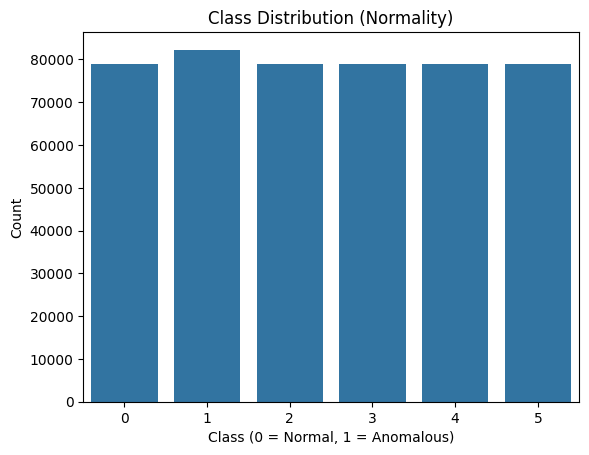

,count
normality,
1,82285
4,79052
0,79035
5,79032
2,79020
3,79002


In [ ]:
# Count plot to visualize the distribution of the 'normality' target variable
# Use 'data' instead of 'dataset' to access the loaded DataFrame
sns.countplot(x=data['normality'])
plt.title('Class Distribution (Normality)')
plt.xlabel('Class (0 = Normal, 1 = Anomalous)')
plt.ylabel('Count')
plt.show()

# Display value counts for each class
class_distribution = data['normality'].value_counts()  # Use 'data' here as well
class_distribution

In [ ]:
# Drop irrelevant columns (assuming columns like 'frame.time', 'eth.src', etc., are identifiers)
columns_to_drop = ['frame.time', 'eth.src', 'eth.dst', 'frame.number']
data_cleaned = data.drop(columns=columns_to_drop, errors='ignore')

# Handle missing values by filling them with the median of each column
data_cleaned.fillna(data_cleaned.median(), inplace=True)

# Separate features (X) and labels (y)
# Exclude the 'Attack_Type' column and 'normality' as labels for now
X = data_cleaned.drop(columns=['Attack_Type', 'normality'], errors='ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier understanding
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
# Train-test split (assuming a placeholder target, since 'normality' isn't used)
X_train, X_test = train_test_split(X_scaled_df, test_size=0.3, random_state=42)

X_scaled_df.head(), X_train.shape, X_test.shape

(   frame.len    ip.src    ip.dst  ip.proto    ip.len   tcp.len  tcp.srcport  \
 0  -0.755139 -0.331773  0.194451  0.956554 -0.589109 -0.693919     0.915776   
 1  -0.664512 -0.331773  0.194451  0.956554 -0.506778 -0.693919     1.175284   
 2  -0.664512  0.524522 -0.276066  0.956554 -0.506778 -0.693919    -0.847209   
 3  -0.755139  0.524522 -0.276066  0.956554 -0.589109 -0.693919    -0.847209   
 4  -0.755139 -0.331773  0.194451  0.956554 -0.589109 -0.693919     1.175284   
 
    tcp.dstport     Value  
 0    -0.288360 -0.031222  
 1    -0.288360 -0.031222  
 2     3.370359 -0.031222  
 3     2.900905 -0.031222  
 4    -0.288360 -0.031222  ,
 (334198, 9),
 (143228, 9))

In [ ]:
# Fill missing values with the median
data.fillna(data.median(), inplace=True)

In [ ]:
# Step 2: Prepare features (X) and target (y)
X = data.drop(columns=['normality', 'Attack_Type'], errors='ignore')  # Features
y = data['normality']  # Target variable

# Step 3: Split dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

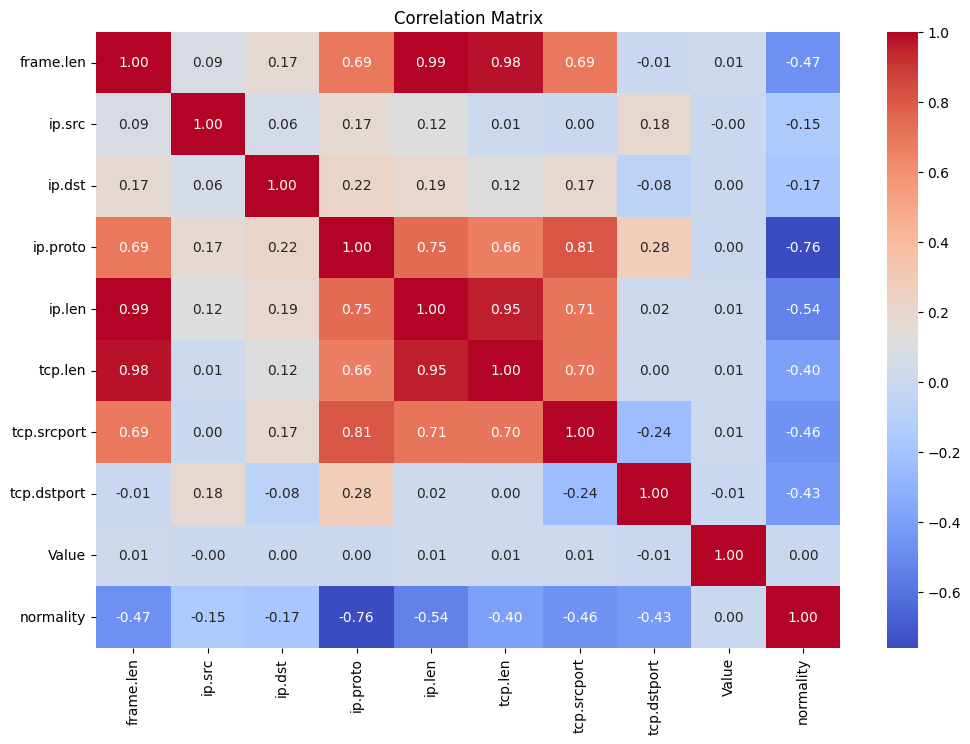

In [ ]:
# Step 2: Compute the correlation matrix
correlation_matrix = data_cleaned.corr()

# Step 3: Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Step 4: Select features highly correlated with the target variable (e.g., 'normality')
threshold = 0.3  # Adjust as needed
if 'normality' in correlation_matrix.columns:
    target_corr = correlation_matrix['normality'].drop('normality')
    selected_features = target_corr[abs(target_corr) > threshold].index.tolist()

    print("Selected Features based on correlation with 'normality':", selected_features)

Selected Features based on correlation with 'normality': ['frame.len', 'ip.proto', 'ip.len', 'tcp.len', 'tcp.srcport', 'tcp.dstport']


In [ ]:
# Step 5: Drop features with high multicollinearity
def drop_highly_correlated_features(correlation_matrix, threshold=0.8):
    """Drop one of each pair of features with correlation higher than the threshold."""
    columns_to_drop = set()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                columns_to_drop.add(colname)
    return list(columns_to_drop)

high_corr_features = drop_highly_correlated_features(correlation_matrix)
print("Features to drop due to high multicollinearity:", high_corr_features)

Features to drop due to high multicollinearity: ['tcp.len', 'tcp.srcport', 'ip.len']


In [ ]:
# Step 6: Final feature set after selection
final_features = [col for col in selected_features if col not in high_corr_features]
print("Final Selected Features:", final_features)

Final Selected Features: ['frame.len', 'ip.proto', 'tcp.dstport']


In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
# 1. Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_class_report = classification_report(y_test, nb_predictions, output_dict=True)

print("Naive Bayes Accuracy:", nb_accuracy)
print("\nClassification Report for Naive Bayes:\n", classification_report(y_test, nb_predictions))

Naive Bayes Accuracy: 0.5715991286619935

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       1.00      0.00      0.01     23710
           1       0.67      1.00      0.80     24685
           2       0.79      0.64      0.71     23706
           3       0.58      0.99      0.73     23701
           4       0.29      0.13      0.18     23716
           5       0.43      0.64      0.51     23710

    accuracy                           0.57    143228
   macro avg       0.63      0.57      0.49    143228
weighted avg       0.63      0.57      0.49    143228



In [ ]:
# # Step 4: Decision Tree with Higher Regularization
dt_model = DecisionTreeClassifier(
    max_depth=5,  # Limiting depth to make the tree more generalized
    min_samples_split=20,  # Increase the number of samples required to split a node
    min_samples_leaf=5,  # Increase the number of samples required at a leaf node
    max_features='sqrt',  # Use only a subset of features at each split for more randomness
    random_state=42,
    ccp_alpha=0.01  # Post-pruning (complexity parameter) to prune branches and avoid overfitting
)

In [ ]:
# Cross-validation for Decision Tree
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation

In [ ]:
# Fit the model on the training data
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_class_report = classification_report(y_test, dt_predictions, output_dict=True)

In [ ]:
# Print the cross-validation scores and accuracy on test set
print("Decision Tree Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))
print("Decision Tree Accuracy on Test Set:", dt_accuracy)
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, dt_predictions))

Decision Tree Cross-Validation Scores: [0.99236984 0.99370138 0.99329743 0.84785829 0.99262407]
Average Cross-Validation Score: 0.9639701989298418
Decision Tree Accuracy on Test Set: 0.9931507805736308

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     23710
           1       0.98      1.00      0.99     24685
           2       0.99      1.00      1.00     23706
           3       1.00      0.99      1.00     23701
           4       1.00      1.00      1.00     23716
           5       0.99      1.00      0.99     23710

    accuracy                           0.99    143228
   macro avg       0.99      0.99      0.99    143228
weighted avg       0.99      0.99      0.99    143228



In [ ]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have X_train, X_test, y_train, y_test already defined

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test) # This line is added

# 3. K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default 5 neighbors
knn_model.fit(X_train_scaled, y_train)  # Use scaled features
knn_predictions = knn_model.predict(X_test_scaled) # Now X_test_scaled is defined
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_class_report = classification_report(y_test, knn_predictions, output_dict=True)

print("KNN Accuracy:", knn_accuracy)
print("\nClassification Report for KNN:\n", classification_report(y_test, knn_predictions))

KNN Accuracy: 0.9993855949953919

Classification Report for KNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23710
           1       1.00      1.00      1.00     24685
           2       1.00      1.00      1.00     23706
           3       1.00      1.00      1.00     23701
           4       1.00      1.00      1.00     23716
           5       1.00      1.00      1.00     23710

    accuracy                           1.00    143228
   macro avg       1.00      1.00      1.00    143228
weighted avg       1.00      1.00      1.00    143228



In [ ]:
# 4. Logistic Regression (ensure no iteration limit issues)
lr_model = LogisticRegression(max_iter=500, random_state=42)  # Increase max_iter to avoid warnings
lr_model.fit(X_train_scaled, y_train)  # Use scaled features
lr_predictions = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_class_report = classification_report(y_test, lr_predictions, output_dict=True)

print("Logistic Regression Accuracy:", lr_accuracy)
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, lr_predictions))

Logistic Regression Accuracy: 0.8803585891026894

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     23710
           1       0.99      1.00      0.99     24685
           2       1.00      1.00      1.00     23706
           3       1.00      0.99      1.00     23701
           4       0.64      0.68      0.66     23716
           5       0.66      0.62      0.64     23710

    accuracy                           0.88    143228
   macro avg       0.88      0.88      0.88    143228
weighted avg       0.88      0.88      0.88    143228



In [ ]:
def extract_metrics(class_report):
    # Extract metrics for class 0 (you can modify this if you want metrics for other classes)
    precision = class_report['accuracy']
    recall = class_report['macro avg']['recall']
    f1score = class_report['macro avg']['f1-score']
    return precision, recall, f1score

# Extract metrics for each model
nb_precision, nb_recall, nb_f1 = extract_metrics(nb_class_report)
dt_precision, dt_recall, dt_f1 = extract_metrics(dt_class_report)
knn_precision, knn_recall, knn_f1 = extract_metrics(knn_class_report)
lr_precision, lr_recall, lr_f1 = extract_metrics(lr_class_report)

In [ ]:
# Step 3: Store Results in a Tabular Format
results = pd.DataFrame({
    'Model': ['Naive Bayes', 'Decision Tree', 'K-Nearest Neighbors', 'Logistic Regression'],
    'Accuracy': [nb_accuracy, dt_accuracy, knn_accuracy, lr_accuracy],
    'Precision': [nb_precision, dt_precision, knn_precision, lr_precision],
    'Recall': [nb_recall, dt_recall, knn_recall, lr_recall],
    'F1-Score': [nb_f1, dt_f1, knn_f1, lr_f1]
})

# Print Tabular Results
print("\nOverall Model Performance Results:")
print(results)


Overall Model Performance Results:
                 Model  Accuracy  Precision    Recall  F1-Score
0          Naive Bayes  0.571599   0.571599  0.568710  0.489946
1        Decision Tree  0.993151   0.993151  0.993104  0.993135
2  K-Nearest Neighbors  0.999386   0.999386  0.999385  0.999392
3  Logistic Regression  0.880359   0.880359  0.879558  0.879565


In [ ]:
# Step 6: Confusion Matrices (Optional Visualization)
print("\nConfusion Matrix for Naive Bayes:\n", confusion_matrix(y_test, nb_predictions))
print("\nConfusion Matrix for Decision Tree:\n", confusion_matrix(y_test, dt_predictions))
print("\nConfusion Matrix for KNN:\n", confusion_matrix(y_test, knn_predictions))
print("\nConfusion Matrix for Logistic Regression:\n", confusion_matrix(y_test, lr_predictions))


Confusion Matrix for Naive Bayes:
 [[   75 11389  2407   504    65  9270]
 [    0 24685     0     0     0     0]
 [    0     0 15244  8462     0     0]
 [    0   123     0 23578     0     0]
 [    0     0  1580  8083  3074 10979]
 [    0   886   142     0  7469 15213]]

Confusion Matrix for Decision Tree:
 [[22854   341   223     1    28   263]
 [    0 24685     0     0     0     0]
 [    0     0 23706     0     0     0]
 [    0   124     0 23577     0     0]
 [    0     0     0     0 23716     0]
 [    0     0     0     0     1 23709]]

Confusion Matrix for KNN:
 [[23645    51     0     1    13     0]
 [    5 24672     0     8     0     0]
 [    0     0 23706     0     0     0]
 [    0    10     0 23691     0     0]
 [    0     0     0     0 23716     0]
 [    0     0     0     0     0 23710]]

Confusion Matrix for Logistic Regression:
 [[23475   107     1    58    33    36]
 [    0 24685     0     0     0     0]
 [    0     0 23706     0     0     0]
 [    0   164     0 23537     0 

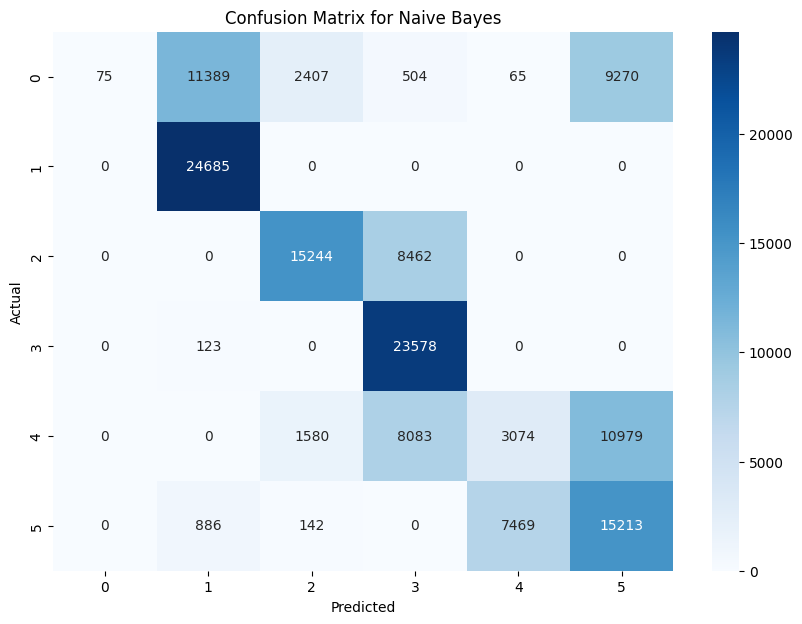

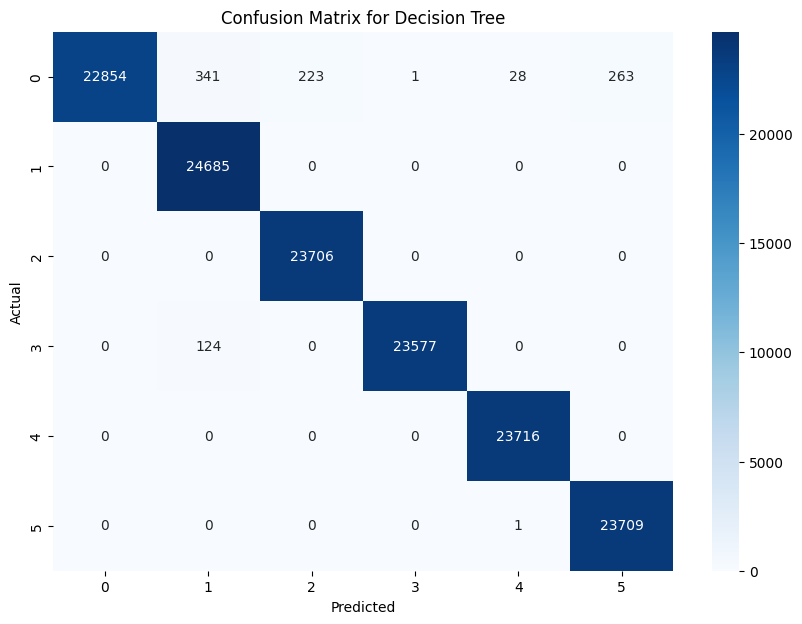

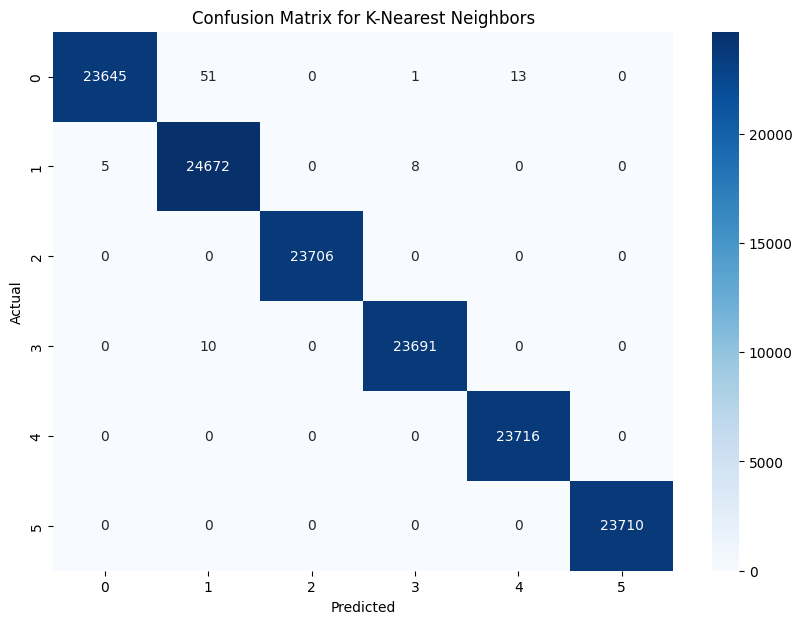

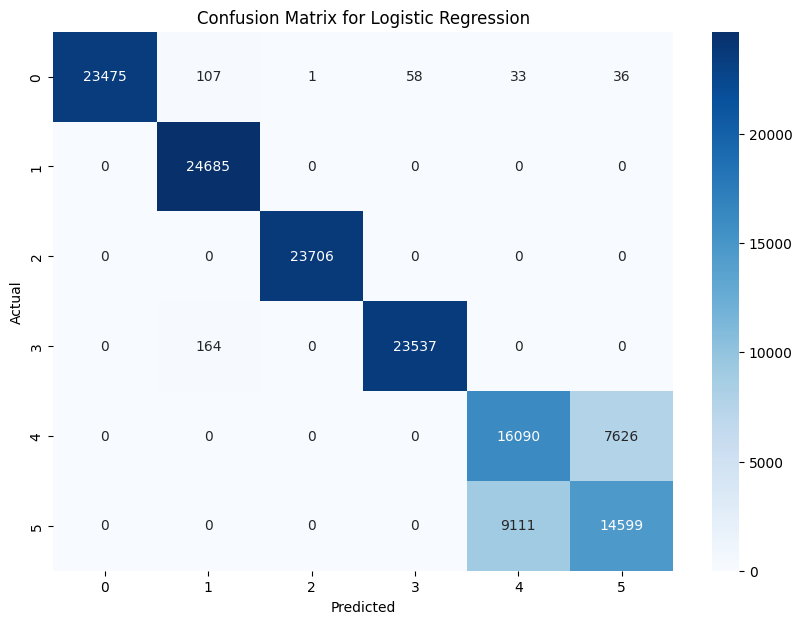

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(y_test, nb_predictions, 'Naive Bayes')
plot_confusion_matrix(y_test, dt_predictions, 'Decision Tree')
plot_confusion_matrix(y_test, knn_predictions, 'K-Nearest Neighbors')
plot_confusion_matrix(y_test, lr_predictions, 'Logistic Regression')